In [ ]:
import pandas as pd
df = pd.read_csv("diabetes.csv")

print("Total Rows and Columns:", df.shape)
print("\nDataset Info:\n")
print(df.info())

Total Rows and Columns: (15000, 10)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB
None


In [ ]:
missing_values = df.isnull().sum().sum()

if missing_values > 0:
    print("Missing values found.\n")
    print(df.isnull().sum())
else:
    print("No missing values found.")


No missing values found.


Class Distribution:
 Diabetic
0    10000
1     5000
Name: count, dtype: int64
Data is Not Highly Imbalanced


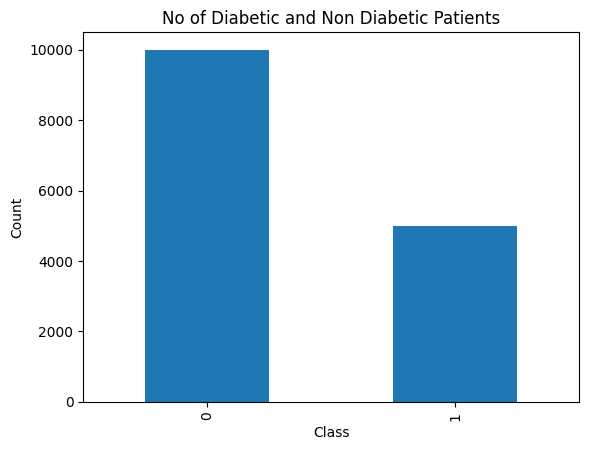

In [ ]:
import matplotlib.pyplot as plt

target_col = df.columns[-1]

counts = df[target_col].value_counts()
print("Class Distribution:\n", counts)

if counts.min() / counts.max() < 0.5:
    print("Data is Highly Imbalanced")
else:
    print("Data is Not Highly Imbalanced")

plt.figure()
counts.plot(kind='bar')
plt.title("No of Diabetic and Non Diabetic Patients")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


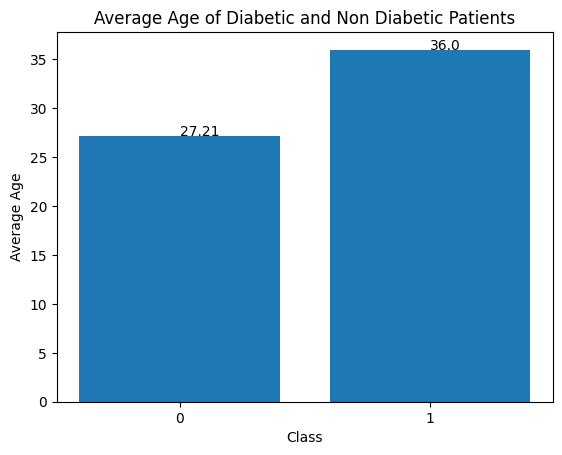

In [ ]:
avg_age = df.groupby(target_col)["Age"].mean()

plt.figure()
bars = plt.bar(avg_age.index.astype(str), avg_age.values)

for i in range(len(avg_age)):
    plt.text(i, avg_age.values[i], round(avg_age.values[i],2))

plt.title("Average Age of Diabetic and Non Diabetic Patients")
plt.xlabel("Class")
plt.ylabel("Average Age")
plt.show()


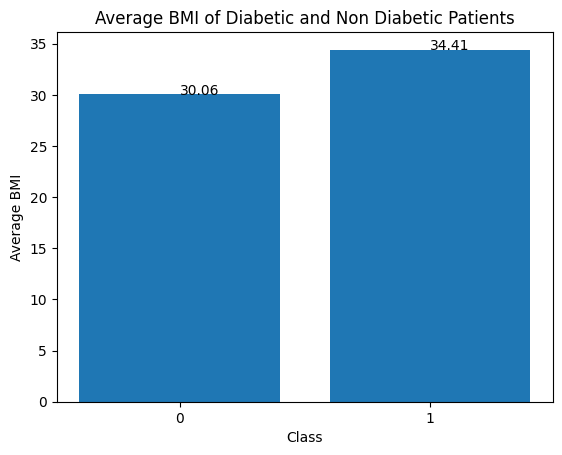

In [ ]:
avg_bmi = df.groupby(target_col)["BMI"].mean()

plt.figure()
bars = plt.bar(avg_bmi.index.astype(str), avg_bmi.values)

for i in range(len(avg_bmi)):
    plt.text(i, avg_bmi.values[i], round(avg_bmi.values[i],2))

plt.title("Average BMI of Diabetic and Non Diabetic Patients")
plt.xlabel("Class")
plt.ylabel("Average BMI")
plt.show()


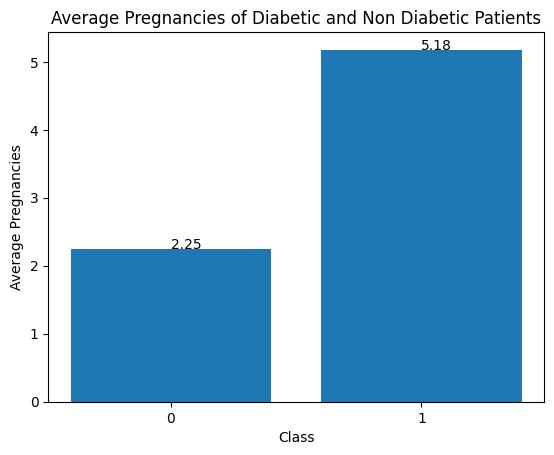

In [ ]:
avg_preg = df.groupby(target_col)["Pregnancies"].mean()

plt.figure()
bars = plt.bar(avg_preg.index.astype(str), avg_preg.values)

for i in range(len(avg_preg)):
    plt.text(i, avg_preg.values[i], round(avg_preg.values[i],2))

plt.title("Average Pregnancies of Diabetic and Non Diabetic Patients")
plt.xlabel("Class")
plt.ylabel("Average Pregnancies")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)

rf.fit(X_train, y_train)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

rf_pred = rf.predict(X_test)
dt_pred = dt.predict(X_test)

results = {
    "RandomForest": {
        "Accuracy": accuracy_score(y_test, rf_pred),
        "Precision": precision_score(y_test, rf_pred),
        "Recall": recall_score(y_test, rf_pred)
    },
    "DecisionTree": {
        "Accuracy": accuracy_score(y_test, dt_pred),
        "Precision": precision_score(y_test, dt_pred),
        "Recall": recall_score(y_test, dt_pred)
    }
}

print(results)


{'RandomForest': {'Accuracy': 0.9286666666666666, 'Precision': 0.917960088691796, 'Recall': 0.8553719008264463}, 'DecisionTree': {'Accuracy': 0.8993333333333333, 'Precision': 0.8611713665943601, 'Recall': 0.8202479338842975}}


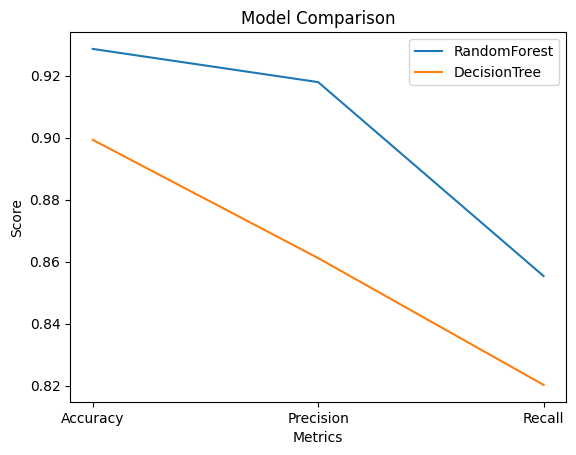

In [ ]:
metrics = ["Accuracy", "Precision", "Recall"]

rf_scores = [results["RandomForest"][m] for m in metrics]
dt_scores = [results["DecisionTree"][m] for m in metrics]

plt.figure()
plt.plot(metrics, rf_scores)
plt.plot(metrics, dt_scores)

plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Model Comparison")
plt.legend(["RandomForest", "DecisionTree"])
plt.show()


Hotel Rental


In [ ]:
hotel = pd.read_csv("hotel_rental.csv")

print("Total Rows and Columns:", hotel.shape)
print("\nDataset Info:\n")
print(hotel.info())


Total Rows and Columns: (100, 6)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   property_id  100 non-null    int64 
 1   address      100 non-null    object
 2   postal_code  100 non-null    int64 
 3   size         100 non-null    int64 
 4   bedrooms     100 non-null    int64 
 5   rent_amount  100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB
None


In [ ]:
hotel = hotel.select_dtypes(include=['number'])


In [ ]:
X = hotel.iloc[:, :-1]
y = hotel.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

knn = KNeighborsRegressor()
rf_reg = RandomForestRegressor(random_state=42)
lr = LinearRegression()

knn.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

models = {
    "KNN": knn.predict(X_test),
    "RandomForest": rf_reg.predict(X_test),
    "LinearRegression": lr.predict(X_test)
}

performance = {}

for name, pred in models.items():
    performance[name] = {
        "MAE": mean_absolute_error(y_test, pred),
        "MAPE": mean_absolute_percentage_error(y_test, pred)
    }

print(performance)


{'KNN': {'MAE': 204.5, 'MAPE': 0.08949804426269323}, 'RandomForest': {'MAE': 91.82000000000002, 'MAPE': 0.037295855623498686}, 'LinearRegression': {'MAE': 54.49259985745921, 'MAPE': 0.022538552204696492}}


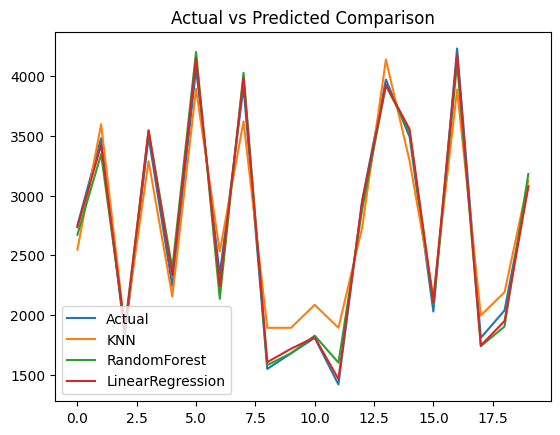

In [ ]:
plt.figure()
plt.plot(y_test.values)
plt.plot(models["KNN"])
plt.plot(models["RandomForest"])
plt.plot(models["LinearRegression"])

plt.legend(["Actual", "KNN", "RandomForest", "LinearRegression"])
plt.title("Actual vs Predicted Comparison")
plt.show()
